In [1]:
import getpass
uname = getpass.getuser()

if uname == 'prometheus' or uname == 'jp':
    data_dir = '/home/'+uname+'/data/transit/c16-tpf/'
elif uname == 'muscat':
    data_dir = '../c16-tpf/'
else: 
    data_dir = '.'

In [2]:
import matplotlib.pyplot as pl
%matplotlib inline

import os
from glob import glob
import numpy as np
from astropy.io import fits
import pandas as pd

In [3]:
file_list = glob(data_dir+'/Yu2018_candidates/*.fits')
file_list.sort()
len(file_list)

31

In [4]:
fname = file_list[-1]

rec_array = fits.open(fname)
rec_array.info()

Filename: /home/jp/data/transit/c16-tpf//Yu2018_candidates/ktwo251319382-unofficial-tpf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  TARGETTABLES    1 BinTableHDU    284   3888R x 12C   [D, E, J, 156J, 156E, 156E, 156E, 156E, 156E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (12, 13)   int32   


In [5]:
index = 1
hdr  = rec_array[index].header
data = rec_array[index].data

In [6]:
obj_name = hdr['OBJECT']

bjdref = hdr['BJDREFI']
start = bjdref+hdr['TSTART']
stop  = bjdref+hdr['TSTOP']
ndata = len(data)

times = np.linspace(start,stop,ndata)

Which exactly is (raw) flux?

What is the difference between index 3,4,5?

In [7]:
index = 3 #3,4,5

shape = data[0][index].shape
h,w = shape[0], shape[1]

fluxes = np.zeros((len(data),h,w))

for i in range(len(data)):
    fluxes[i,:,:] = data[i][index]

In [8]:
fluxes.shape

(3888, 13, 12)

In [10]:
import sys
sys.path.append('../K2tools')
from utils import *

times, fluxes = tpf2pix(fname,index=3)

Analyzing EPIC 251319382...



In [11]:
fluxes.shape

(3888, 13, 12)

Comparing with lightkurve.KeplerTargetPixelFile

In [12]:
from lightkurve import KeplerTargetPixelFile

tpf = KeplerTargetPixelFile(fname, quality_bitmask='hardest')

In [13]:
tpf.flux.shape

(3888, 13, 12)

In [14]:
aper_rad = 5
irregular_mask = make_mask(fluxes,cutoff_limit=1.0,shape='irregular')
round_mask  = make_mask(fluxes,rad=aper_rad,shape='round')
square_mask = make_mask(fluxes,rad=aper_rad,shape='square')

In [15]:
lc = tpf.to_lightcurve(aperture_mask='all');

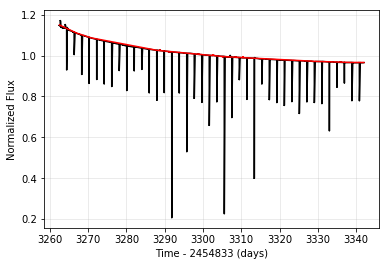

In [16]:
flat_lc, trend = lc.flatten(window_length=301, return_trend=True)

ax = lc.plot()                         
trend.plot(ax, color='red');

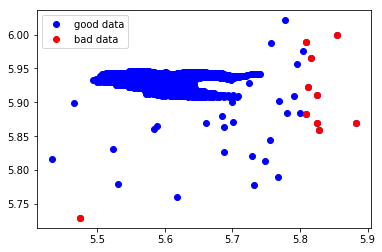

In [17]:
centroids, centroid_mask = get_centroids(fluxes, centroid_shift=0.2,
                                         check_outliers=True, showfig=True)

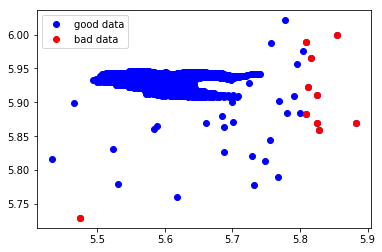

In [18]:
method = 'abs_distance'

times, fluxes = tpf2pix(fname,index=3,verbose=False)
centroids, centroid_mask = get_centroids(fluxes,  centroid_shift=0.2, method=method,
                                         check_outliers=True, showfig=True)

In [19]:
df = pix2lc(times,fluxes,aper_rad=5,aper_shape='round',
           cutoff_limit=1.0,centroid_shift=0.2,method=method)

In [20]:
df = pix2lc(times,fluxes,aper_rad=5,aper_shape='round',
           cutoff_limit=1.0,centroid_shift=0.2,method=method)

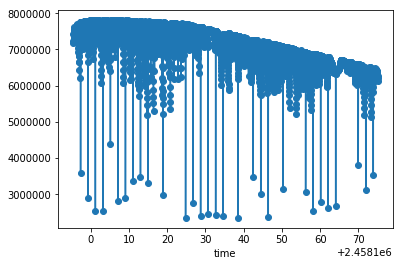

In [21]:
df.set_index('time')['flux'].plot(marker='o')

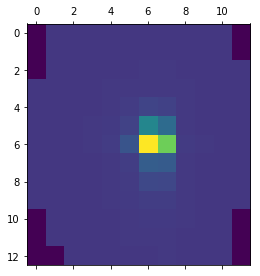

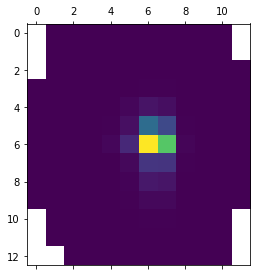

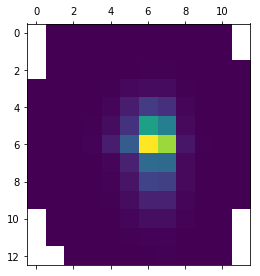

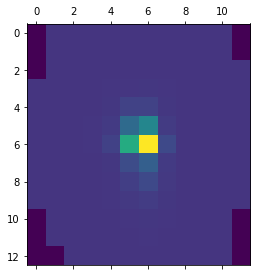

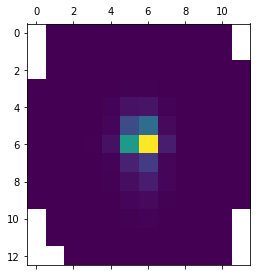

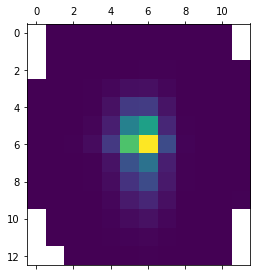

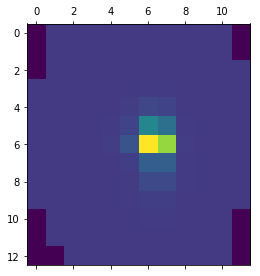

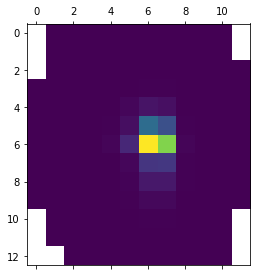

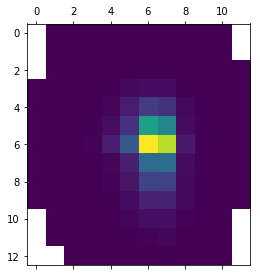

In [72]:
for i in np.arange(3,6,1):
    for j in np.arange(3,6,1):
        try:
            pl.matshow(data[i][j])
        except:
            print('skipping index={}'.format(i))